In [32]:
import quadshit as qs
reload(qs)
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

In [33]:
D=qs.QuadShit()

In [48]:
L=D.getLmatrix(1)

In [49]:
v=np.cos(np.arange(1024)*2*np.pi/1024)
print D.r2rfft(v)[:10]
np.dot(L,v)[:10]


[ -1.24477772e-15  -1.20760037e-14   2.26274170e+01   5.08994835e-17
   5.62307785e-16   1.71091960e-17  -2.69369940e-15  -6.42933119e-17
   1.13325569e-16  -5.42247440e-17]


array([ -1.08940438e-15,  -1.20789458e-14,   2.26274170e+01,
        -2.59460133e-15,   1.18316385e-15,   7.70029623e-16,
        -1.35381754e-15,  -1.88366359e-16,  -7.25435190e-17,
         1.88578346e-15])

[ 1.  1.  1. ...,  1.  1.  1.]
1024.0 1024.0


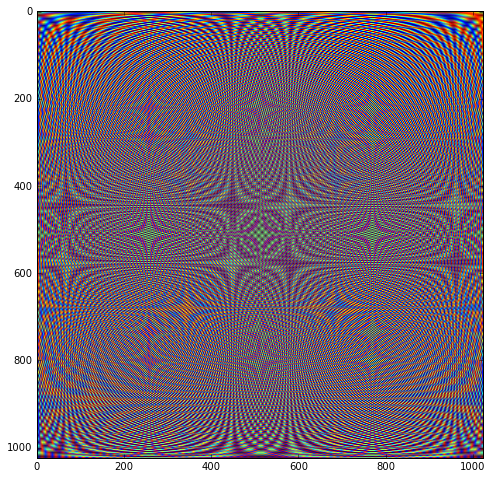

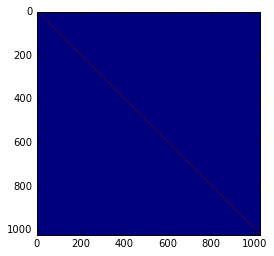

In [50]:
plt.figure(figsize=(8,8))
plt.imshow(L)
Id=np.dot(L,L.T)
print Id.diagonal()
print Id.sum(),Id.diagonal().sum()
plt.figure()
plt.imshow(Id)

Creating Sp
Creating Sp


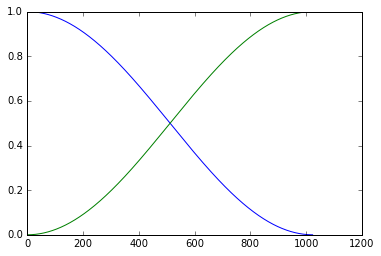

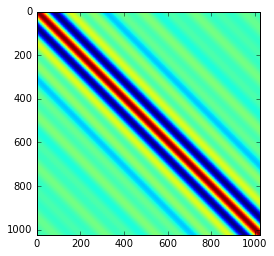

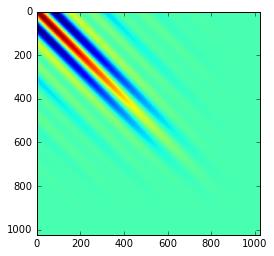

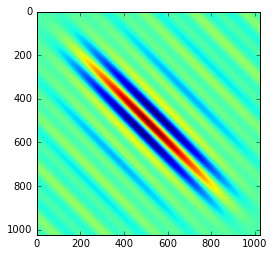

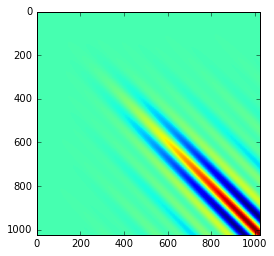

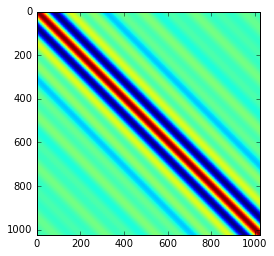

In [73]:
reload(qs)
D=qs.QuadShit(A2=2.0)
# derivs
Sp,xil,wl,wh=D.getSp3Alt()
plt.plot(wl)
plt.plot(wh)
Sp1,xil=D.getSponez()
for S in [Sp1[2], Sp[2], Sp[7],Sp[12],Sp[2]+Sp[7]+Sp[12]]:
    plt.figure()
    plt.imshow(S,interpolation='nearest')


In [74]:
LSL=[np.dot(np.dot(L,S),L.T) for S in Sp]

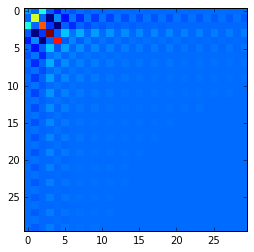

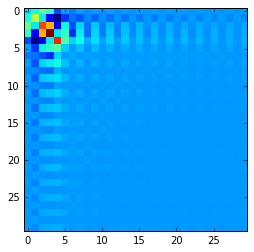

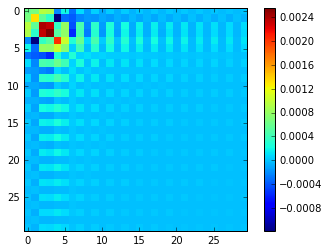

In [75]:
plt.figure()
plt.imshow(LSL[2][:30,:30],interpolation='nearest')
plt.figure()
plt.imshow(LSL[7][:30,:30],interpolation='nearest')
plt.figure()
plt.imshow(LSL[12][:30,:30],interpolation='nearest')

plt.colorbar()

In [76]:
cid=D.CI*D.genskew_masked()
lcid=np.dot(L,cid)

In [77]:
FDT=0.5*np.array([np.dot(np.dot(S,cid),cid) for S in Sp])
print FDT

[  1.69814991e-01   7.82492612e-01   2.47919967e+00   1.28126274e+00
   1.37808821e+02   2.62662981e-02   4.86026924e-02   1.05169554e+00
   6.03867876e-01   5.41439017e+01   4.36308347e-02   9.63408163e-02
   1.16876449e+00   1.35260333e+00   5.80115491e+01]


In [78]:
FDL=0.5*np.array([np.dot(np.dot(SL,lcid),lcid) for SL in LSL])
print FDL/FDT

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Creating Sp
----------------------
Nfft= 1 elements used: -1
ratios FD: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
rations SD diag: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
ratios values: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
----------------------
Nfft= 1 elements used: 0.1
ratios FD: [ 1.00015231  1.00306202  1.00558718  1.00164621  1.00244135  0.99999933
  0.99999828  0.99999917  0.99999852  1.00000005  1.00245832  1.00580112
  1.00368055  1.00090479  0.99750974]
rations SD diag: [ 0.99999227  0.99997876  0.99996421  0.99994628  0.9966881   1.          1.
  1.          1.          1.          0.99999214  0.99997858  0.99996378
  0.99994568  0.99668496]
ratios values: [ 0.99991879  0.99484726  1.00479018  1.00291194  1.00437917  0.99798933
  0.99733694  0.99699673  0.99846695  0.99933253  0.99816401  1.47408643
  0.99930935  1.0018088   0.99576457]
----------------------
Nfft= 1 elements used: 0.01
ratios FD: [ 0.9946090

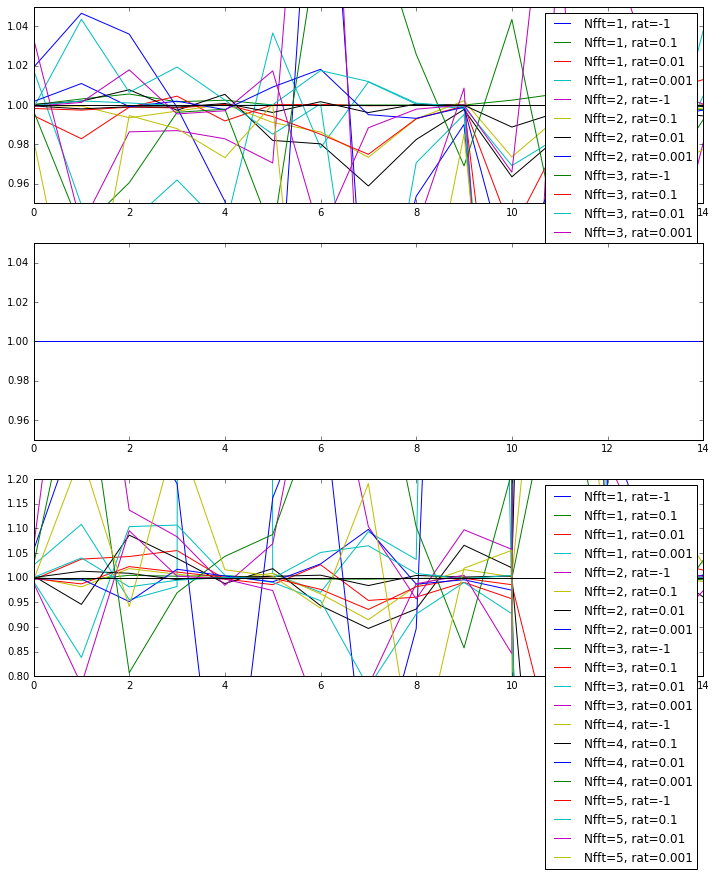

In [99]:
## let's keep just N biggest elements
    
D=qs.QuadShit(N=5*3*64)
cid=D.CI*D.genskew_masked()   
Sp,xil,wl,wh=D.getSp3Alt()
# true, classical OQE FD and SD

N=D.N
Nb=D.Nb*3
TFD=0.5*np.array([np.dot(np.dot(S,cid),cid) for S in Sp])
TSD=np.zeros((Nb,Nb))
CI=np.diag(D.CI)
for i in range(len(TFD)):
    for j in range(i,len(TFD)):
        TSD[i,j]=0.5*np.trace(np.dot(np.dot(CI,Sp[i]),np.dot(CI,Sp[j])))        
        TSD[j,i]=TSD[i,j]
TV=np.dot(la.inv(TSD),TFD)
plt.figure(figsize=(12,12))
for Nl in [1,2,3,4,5]:
    L=D.getLmatrix(Nl)
    lcid=np.dot(L,cid)
    LSL=[np.dot(np.dot(L,S),L.T) for S in Sp]
    for fnbig in [-1,0.1,0.01,0.001]:
        nbig=int(fnbig*N*N)
        nLSL=[]
        for M in LSL:
            Mc=M*1.0
            if (nbig>0):
                v=abs(Mc.flatten())
                v.sort()
                cut=v[-nbig]
                Mc[np.where(abs(Mc)<cut)]=0.0
            nLSL.append(Mc)
        FDL=0.5*np.array([np.dot(np.dot(SL,lcid),lcid) for SL in nLSL])
        SDL=np.zeros((Nb,Nb))
        LCI=np.dot(np.dot(L,np.diag(D.CI)),L.T)
        for i in range(len(FDL)):
            for j in range(i,len(FDL)):
                SDL[i,j]=0.5*np.trace(np.dot(np.dot(LCI,nLSL[i]),np.dot(CI,nLSL[j])))        
                SDL[j,i]=SDL[i,j]
        VL=np.dot(la.inv(SDL),FDL)
        print "----------------------"
        print "Nfft=",Nl,"elements used:",fnbig
        print "ratios FD:",FDL/TFD
        print "rations SD diag:",SDL.diagonal()/TSD.diagonal()
        print "ratios values:",VL/TV
        plt.subplot(3,1,1)
        plt.plot(FDL/TFD,label='Nfft=%i, rat=%g'%(Nl,fnbig))
        plt.subplot(3,2,3)
        plt.plot(SDL.diagonal()/TSD.diagonal(),label='Nfft=%i, rat=%g'%(Nl,fnbig))
        plt.subplot(3,1,3)
        plt.plot(VL/TV,label='Nfft=%i, rat=%g'%(Nl,fnbig))
plt.subplot(3,1,1)
plt.plot(np.ones(15))
plt.ylim(0.95,1.05)
plt.legend()
plt.subplot(3,1,2)
plt.plot(np.ones(15))
plt.ylim(0.95,1.05)
plt.legend()
plt.subplot(3,1,3)
plt.plot(np.ones(15))
plt.ylim(0.8,1.2)
plt.legend()